In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df_tracks = pd.read_csv('../data/spotify_daily_charts_tracks.csv')
df_dc = pd.read_csv('../data/spotify_daily_charts.csv')
df_artists = pd.read_csv('../data/spotify_daily_charts_artists.csv')

In [106]:
df_dc_copy = df_dc.copy()
df_artists = df_artists.copy()
df_tracks = df_tracks.copy()

In [107]:
similar_artists = []
for index, row in df_artists[df_artists.genres.str.contains('indie|rock')].iterrows():
    artist_genres = set()
    for genre in row['genres'].split():
        artist_genres.add(genre.strip("\'[],"))
    if 'pinoy' in artist_genres:
        similar_artists.append(row['artist_name'])

In [108]:
df_dc = df_dc.set_index('date')
df_dc.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [109]:
df_first_stream = pd.DataFrame(df_dc.reset_index().groupby('track_id')['date'].min())
df_first_stream.columns = ['first_stream']

In [110]:
df_dc = df_dc.reset_index().merge(df_first_stream, on='track_id').set_index('date')

In [111]:
df_dc

,position,track_id,track_name,artist,streams,first_stream
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,2017-01-01
2017-01-02,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,218117,2017-01-01
2017-01-03,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,237065,2017-01-01
2017-01-04,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,238409,2017-01-01
2017-01-05,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,244616,2017-01-01
...,...,...,...,...,...,...
2021-01-14,174,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,30105,2021-01-14
2021-01-15,173,4Yxc55NX3tAXC2mHRAhtcW,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,30198,2021-01-14
2021-01-15,21,3jjBPF4NDMCU51psU8JPpR,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",Ariana Grande,98123,2021-01-15


In [126]:
# dataframe of total streams of track charting prior to 2020-11-01
total_streams = pd.DataFrame(df_dc[(df_dc.first_stream <= '2020-11-01') & (df_dc.first_stream >= '2019-01-01')].groupby('track_id')['streams'].sum())

In [127]:
df_merged = total_streams.merge(df_tracks, on='track_id')

In [128]:
df_merged = df_merged.merge(df_artists[['total_followers', 'artist_id']], on='artist_id')

In [129]:
df_merged[df_merged.duplicated()]

,track_id,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers


In [130]:
# drop tracks w na
is_na = df_merged[df_merged.isnull().any(1)].index.to_list()
df_merged.drop(is_na, inplace=True)

In [132]:
df_merged.set_index('track_id', inplace=True)

In [133]:
df_merged['duration'].describe()

count      1247.000000
mean     210433.758621
std       48790.014025
min       41866.000000
25%      181451.000000
50%      202066.000000
75%      232018.500000
max      536217.000000
Name: duration, dtype: float64

In [134]:
from sklearn.preprocessing import StandardScaler

# Scale Duration, Loudness, Tempo, and total_followers
col_names = ['duration', 'loudness', 'tempo', 'total_followers']
features = df_merged[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_merged[col_names] = features
df_merged

,streams,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
track_id,,,,,,,,,,,,,,,,,,,,
011GTFfE8rqTRMhz5g8IAW,3924678,Repeat,2G7VQ1kVhVfNagytlousgm,Al James,4VvCsIUWUn9vwpPaeDIymm,0.401191,2020-01-24,59,0.844,0.314,9,-2.235137,0,0.3460,0.4340,0.000770,0.0787,0.571,0.053743,-0.762982
6Fh0xf6gIgBJ5FyjAZmmI8,2133814,LATINA,2G7VQ1kVhVfNagytlousgm,Al James,1tPqEy6tzVE1eHy0vjbW78,0.019935,2019-07-19,59,0.841,0.704,4,0.606450,0,0.0393,0.1640,0.000013,0.1840,0.523,0.350977,-0.762982
017PF4Q3l4DBUiWoXk4OWT,12485460,Break My Heart,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,7fJJK56U9fHixgO0HQkhtI,0.233466,2020-03-27,88,0.730,0.729,4,1.159019,0,0.0883,0.1670,0.000001,0.3490,0.467,-0.206782,0.648270
0vQcyuMEfRBd21ojZ62N2L,26810,Boys Will Be Boys,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,7fJJK56U9fHixgO0HQkhtI,-0.905625,2020-03-27,71,0.768,0.486,3,0.303692,1,0.0353,0.4080,0.000000,0.0980,0.519,0.238476,0.648270
1nYeVF5vIBxMxfPoL0SIWg,101807,Hallucinate,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,7fJJK56U9fHixgO0HQkhtI,-0.039548,2020-03-27,81,0.627,0.690,10,0.493086,0,0.1390,0.0330,0.000000,0.0742,0.627,0.128422,0.648270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7n7mTiptQT1iNa7rMhcZS8,2557385,"A Perfect Christmas - Recorded at OnQ Studios,...",7vwlQ7XElRyPMJQGUXBz4O,Tatak Pinoy All-Stars,1aifvRID8WVENI4KDyCx27,1.500627,2019-11-22,60,0.358,0.571,4,-0.165720,1,0.0288,0.6630,0.000000,0.0935,0.456,2.417934,-0.785046
7namdlOhbtsc8FvoSafOQt,950443,Lost in the Woods,7KkqUt65v6LMtR369OQ6FB,Jonathan Groff,4M07HWIlZr7zoXoxDHR5mz,-0.608396,2019-11-15,71,0.366,0.478,8,-0.041833,1,0.0277,0.6950,0.000009,0.1240,0.293,1.139003,-0.780151
7wFybC8jBH3zE139OpCtpG,777260,Lost in the Fire,3hteYQFiMFbJY7wS0xDymP,Gesaffelstein,3gXi45Aift9hCoB6lvuVJb,-0.171021,2019,1,0.663,0.675,2,-1.802382,1,0.0359,0.0863,0.001330,0.1170,0.176,-0.652078,-0.761792


## Split data into train and test

In [135]:
# Create feature and target dataset
X = df_merged[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'total_followers']]
y = df_merged['streams']

In [136]:
X.shape, y.shape

((1247, 11), (1247,))

In [137]:
X.describe()

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers
count,1.247000e+03,1247.000000,1247.000000,1.247000e+03,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03,1.247000e+03
mean,6.267819e-17,0.642026,0.598721,-2.364677e-16,0.085527,0.281123,0.013701,0.175774,0.465076,-1.182339e-16,2.279207e-17
std,1.000401e+00,0.144434,0.190245,1.000401e+00,0.081416,0.275287,0.087070,0.135255,0.214073,1.000401e+00,1.000401e+00
min,-3.456350e+00,0.184000,0.059600,-5.906255e+00,0.023200,0.000002,0.000000,0.032500,0.037600,-2.447942e+00,-7.854510e-01
25%,-5.942689e-01,0.550000,0.463000,-5.151483e-01,0.036400,0.050900,0.000000,0.094550,0.294500,-7.628730e-01,-7.145543e-01
50%,-1.715744e-01,0.663000,0.607000,1.333051e-01,0.055500,0.173000,0.000000,0.121000,0.463000,-4.711542e-02,-4.849595e-01
75%,4.425783e-01,0.746000,0.747000,7.225305e-01,0.091800,0.460000,0.000027,0.209000,0.628500,6.468576e-01,3.975140e-01
max,6.679931e+00,0.953000,0.969000,1.986854e+00,0.557000,0.978000,0.908000,0.944000,0.973000,3.295917e+00,4.065870e+00


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((935, 11), (312, 11), (935,), (312,))

## Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, X.shape[1]))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [142]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005863,6.180847e-04,0.001368,4.787080e-04,2,{'n_features_to_select': 2},0.019317,0.005436,-0.026921,0.025143,...,0.007042,0.018228,5,0.015647,0.017972,0.018914,0.013690,0.016200,0.016485,0.001828
1,0.005081,3.909826e-04,0.000977,1.168008e-07,3,{'n_features_to_select': 3},0.001938,-0.004965,-0.025337,0.030305,...,0.001146,0.017869,7,0.022288,0.024746,0.022033,0.016288,0.018424,0.020755,0.003010
2,0.004886,6.180847e-04,0.001173,3.908873e-04,4,{'n_features_to_select': 4},-0.009631,-0.006396,-0.036520,0.042930,...,0.000024,0.026097,9,0.024364,0.025633,0.023614,0.022601,0.020051,0.023252,0.001882
3,0.003908,1.168008e-07,0.000977,2.336015e-07,5,{'n_features_to_select': 5},-0.010244,-0.004868,-0.038182,0.043542,...,0.000625,0.027005,8,0.033555,0.034967,0.023715,0.022694,0.020543,0.027095,0.005957
4,0.004299,4.785717e-04,0.001173,3.909111e-04,6,{'n_features_to_select': 6},-0.006847,-0.004390,-0.033572,0.044293,...,0.004933,0.027083,6,0.033903,0.035069,0.031796,0.022712,0.025680,0.029832,0.004812
5,0.003909,1.236169e-03,0.001368,4.789611e-04,7,{'n_features_to_select': 7},-0.006784,-0.004140,-0.029810,0.063141,...,0.009557,0.032019,4,0.033903,0.035072,0.032302,0.029986,0.025727,0.031398,0.003309
6,0.002932,6.743496e-07,0.000977,3.873843e-07,8,{'n_features_to_select': 8},0.006104,-0.001458,-0.020873,0.061405,...,0.015163,0.028407,1,0.043006,0.046761,0.042609,0.030112,0.036580,0.039814,0.005846
7,0.002540,4.786304e-04,0.001173,3.912211e-04,9,{'n_features_to_select': 9},0.005760,-0.029017,-0.022480,0.063134,...,0.009956,0.034408,3,0.043018,0.055641,0.042667,0.030200,0.036902,0.041686,0.008394
8,0.001954,5.309834e-07,0.001173,3.906014e-04,10,{'n_features_to_select': 10},0.003802,-0.028027,-0.024734,0.065070,...,0.010249,0.035651,2,0.043175,0.055664,0.045837,0.032836,0.039242,0.043351,0.007554


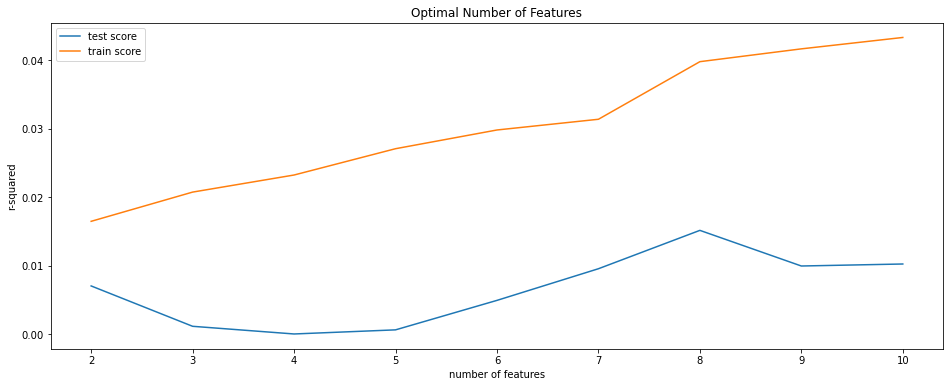

In [143]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [144]:
pred = model_cv.best_estimator_.predict(X_test)

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 5399672.871821286
Mean Squared Error: 83508971116753.72
Root Mean Squared Error: 9138324.305733176


In [146]:
y_test.describe()

count    3.120000e+02
mean     4.449542e+06
std      9.269523e+06
min      1.964800e+04
25%      1.399900e+05
50%      7.780390e+05
75%      3.507273e+06
max      6.098336e+07
Name: streams, dtype: float64

## Random Forest Classifier

In [147]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [148]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=10)

In [149]:
best_model = rf_random.best_estimator_

In [150]:
pred = best_model.predict(X_test)

In [151]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 5266086.151703193
Mean Squared Error: 84470973445031.11
Root Mean Squared Error: 9190809.183365256


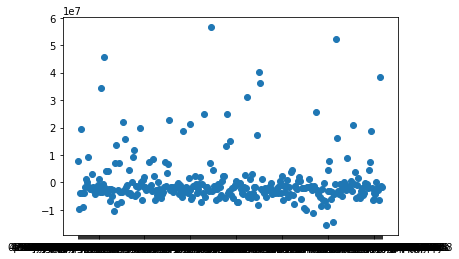

In [152]:
plt.plot(y_test-pred, marker='o', linestyle='')

<BarContainer object of 11 artists>

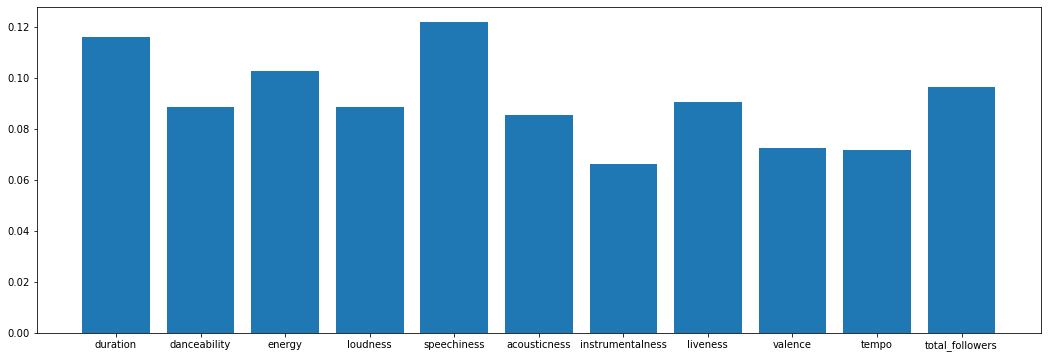

In [153]:
fig = plt.figure(figsize=(18,6))
plt.bar(x=X.columns, height=best_model.feature_importances_)

In [154]:
results = pd.DataFrame(y_test)
results['predicted'] = pred
results

,streams,predicted
track_id,,
0pYacDCZuRhcrwGUA5nTBe,11424282,3.572475e+06
4enEJGj42a9Nk9Gh7DNhWL,1019167,1.080372e+07
4LkUk89J5n1gaEcGxMTGUt,23694,3.837236e+06
1dGr1c8CrMLDpV6mPbImSI,22578419,3.121133e+06
5O2P9iiztwhomNh8xkR9lJ,83336,3.780292e+06
...,...,...
5MvLsT03RBp67RLoeISCdl,317141,3.015672e+06
17Ux4yT9fdJ8VFSPNgxZPC,333397,6.666185e+06
6IdEQ3HUseBeRUYFSzSMdL,49767819,1.148629e+07


In [155]:
results['accuracy'] = abs((results['streams'] - results['predicted']) / results['streams'])*100

In [156]:
results.merge(df_tracks[['track_name', 'track_id', 'artist_name']], on='track_id').sort_values('accuracy').head(10)

,track_id,streams,predicted,accuracy,track_name,artist_name
9,22LAwLoDA5b4AaGSkg6bKW,6844204,6.792334e+06,0.757871,Blueberry Faygo,Lil Mosey
166,1iQDltZqI7BXnHrFy4Qo1k,3856001,3.911298e+06,1.434038,Trampoline (with ZAYN),SHAED
165,0BEpSEV02FM1N5gcw2fsJC,2435842,2.481401e+06,1.870377,Kung Ayaw Mo Wag Mo - Recorded at Kodama Studi...,IV Of Spades
251,59aZ0ioyVrmtdut1KfU5aT,2863350,2.946719e+06,2.911595,Amatz,Shanti Dope
272,4DpNNXFMMxQEKl7r0ykkWA,3418621,3.284936e+06,3.910483,Play Date,Melanie Martinez
305,5Uw7Dut2lZfexn3Y09swpf,1797438,1.722998e+06,4.141475,Find U Again (feat. Camila Cabello),Mark Ronson
55,3i9UVldZOE0aD0JnyfAZZ0,7415367,7.072763e+06,4.620195,Lover (Remix) [feat. Shawn Mendes],Taylor Swift
64,5yY9lUy8nbvjM1Uyo1Uqoc,3107986,2.960604e+06,4.742053,Life Is Good (feat. Drake),Future
102,1mpD5Q8IM32I4bF6eCpU74,2436081,2.596475e+06,6.584082,Up All Night,Khalid
206,22vgEDb5hykfaTwLuskFGD,5607358,5.110488e+06,8.861030,Sucker,Jonas Brothers


In [157]:
results.merge(df_tracks[['track_name', 'track_id', 'artist_name']], on='track_id').sort_values('accuracy').tail(50)

,track_id,streams,predicted,accuracy,track_name,artist_name
310,7r6bu5Xd0q2TK1QQMduxb8,34420,1.489851e+06,4228.446237,Dynamite - Tropical Remix,BTS
37,0AiUFrU3Bj0ZzYFSWoAM0O,242703,1.064840e+07,4287.419849,Esmi,Because
4,5O2P9iiztwhomNh8xkR9lJ,83336,3.780292e+06,4436.205441,Night Changes,One Direction
260,15xT6IkTumRGbbSim0t11u,78076,3.656184e+06,4582.852464,Louder than bombs,BTS
182,0lTurWECr2XL607eJAj1A3,114676,5.505137e+06,4700.600852,I'll Be Home,Meghan Trainor
112,7L8GQLm6e7cGoMMUAgWCVp,81275,3.939471e+06,4747.087669,Huling Sayaw,Kamikazee
153,72C7aUQECOhNtnD0AC36ua,80058,4.010444e+06,4909.422640,They Don't Know About Us,One Direction
41,1Spmq0UazGU6ovMIlGldZX,53927,2.892174e+06,5263.127684,Dumb Blonde (feat. Nicki Minaj),Avril Lavigne
105,5RyWp0PkR0Zns1ThRftc6y,58908,3.247914e+06,5413.537069,21:29,TWICE
229,6ceLbOqD2zrnUollgXkKMn,39065,2.215224e+06,5570.610221,Dynamite - Bedroom Remix,BTS


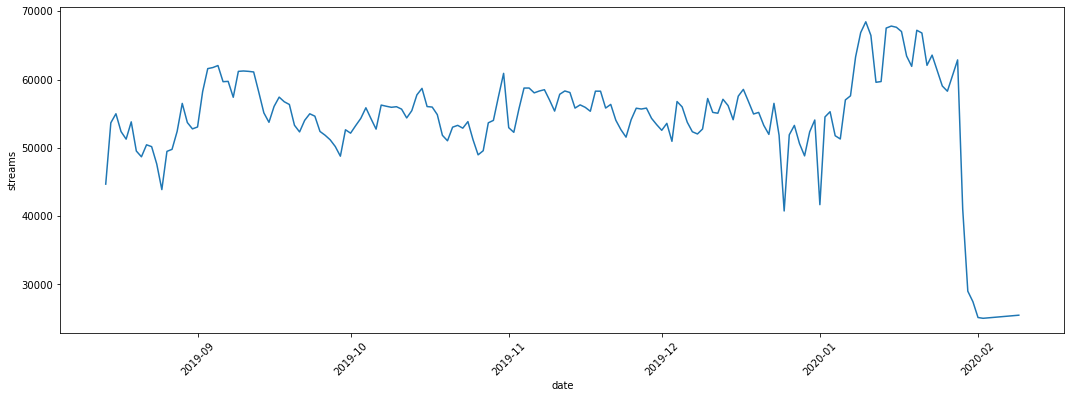

In [90]:
temp = data=df_dc[df_dc['track_name'] == 'Dahilan'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

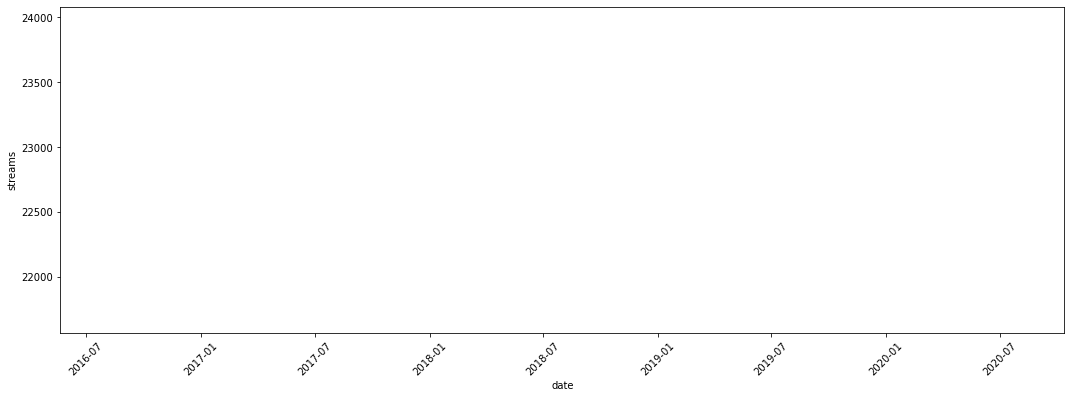

In [100]:
temp = data=df_dc[df_dc['track_name'] == 'Summer on You'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

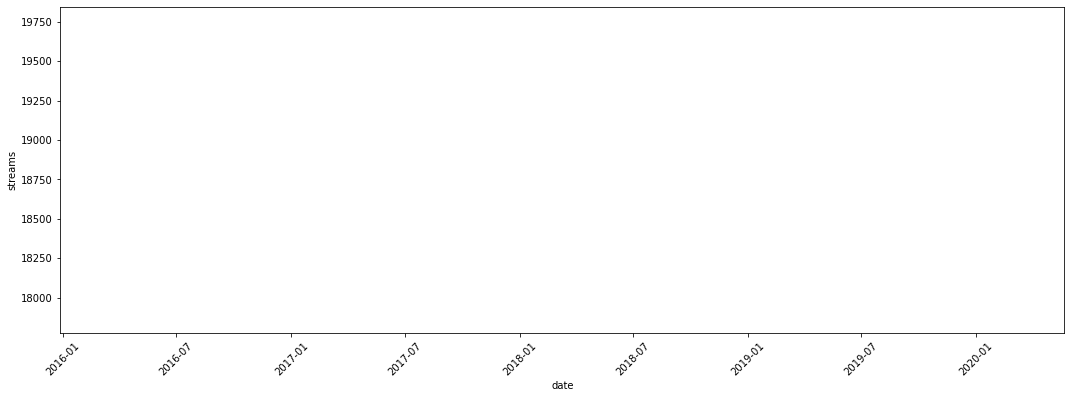

In [92]:
temp = data=df_dc[df_dc['track_name'] == 'Halaga'].reset_index()
temp['date'] = pd.to_datetime(temp['date'])
fig = plt.figure(figsize=(18,6))
g = sns.lineplot(data=temp, x='date', y='streams')
plt.xticks(rotation=45);

In [93]:
df_tracks[df_tracks['track_name'] == 'Halaga']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1195,6pz4tdLoIDJdnpXnisSDCK,Halaga,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,58vdgBfvgzQFZ2VreSPGmU,352120,1999,62,0.489,0.57,2,-9.197,1,0.0364,0.132,0.000001,0.274,0.643,134.486


In [158]:
df_dc[df_dc['track_name'] == 'Night Changes']

,position,track_id,track_name,artist,streams,first_stream
date,,,,,,
2020-07-23,71,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,49675,2020-07-23
2020-07-24,128,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,33661,2020-07-23


In [163]:
df_dc[(df_dc['artist'] == 'Parokya Ni Edgar') & (df_dc.position <= 100)]

,position,track_id,track_name,artist,streams,first_stream
date,,,,,,
2018-05-17,98,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,31566,2017-09-05
2018-05-31,100,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,32500,2017-09-05
2018-06-02,96,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,29707,2017-09-05
2018-06-05,99,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,33981,2017-09-05
2018-06-07,89,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,35951,2017-09-05
...,...,...,...,...,...,...
2021-01-14,56,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,59030,2017-09-05
2021-01-15,58,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,58412,2017-09-05
2018-08-04,87,1ycpU8beNm9bXKvy7s25Jl,Gitara,Parokya Ni Edgar,34802,2017-11-25


c:\users\eric\scoop\apps\miniconda3\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='streams'>

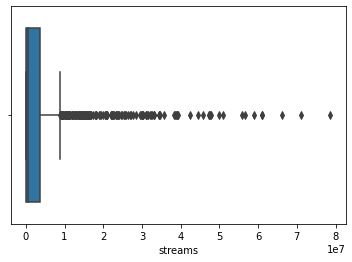

In [165]:
sns.boxplot(df_merged['streams'])